<div align="center">
 <img alt="Deep Learning Indaba" src="https://gitlab.com/instadeep-public/grandchallenge/-/raw/master/dlindaba.jpg" />
    <h1>Grand Challenge</h1>
        <h2>Curing Leishmaniasis</h2>
    <br />
</div>

<h1> </h1>


This notebbok focuses on the evaluation of an arbitrary structure formed by a Leishmania protein (either from a defined species, or a protein present in the proteome of one or more of the Leishmania species) and a small molecule (ligand) which comes from a set of approved drugs.


Authors : Dr Marcin Skwark (m.skwark@instadeep.com) and Dr Nicolas Lopez Carranza (n.lopezcarranza@instadeep.com)


*This notebook is based on [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks) notebooks;
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*
In order to run it, you need to install  [PyRosetta](http://www.pyrosetta.org/dow);

**Setup guide**


1.   Get [PyRosetta license](https://els2.comotion.uw.edu/product/pyrosetta) (for free).
2.   Download the Linux [PyRosetta package](http://www.pyrosetta.org/dow) that is called “Python-3.6.MinSizeRel” (~1.3GB) and upload it to your Google drive.
3.   Make a new folder called “Indaba_grand_challenge” in your top level directory on Google Drive. Inside this folder make a folder called “PyRosetta”.
4.  Upload the "PyRosetta4.MinSizeRel.python36.linux.release-259.tar.bz2" tar file you downloaded in step 2 to the PyRosetta folder. 
5.   Setup PyRosetta on your Google drive by following the steps below.


## PyRosetta Google Drive Setup

Run this notebook to install PyRosetta in Colab. You will only need to do this once. Afterwards, you will be able to initialize and use PyRosetta in any notebook in Colab. 

**NOTE**: running the code below will prompt you to visit a specific URL and enter an authorization code. This is safe, simply click on the provided link, copy the code and paste it in the box below.

In [1]:
# Mounting Google Drive and add it to Python sys path  

google_drive_mount_point = '/content/google_drive'

import os, sys, time

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount(google_drive_mount_point)

google_drive = google_drive_mount_point + '/My Drive'
google_drive_prefix = google_drive + '/prefix'

if not os.path.isdir(google_drive_prefix):
    os.mkdir(google_drive_prefix)

pyrosetta_install_prefix_path = '/content/prefix'
if os.path.islink(pyrosetta_install_prefix_path):
    os.unlink(pyrosetta_install_prefix_path)
os.symlink(google_drive_prefix, pyrosetta_install_prefix_path)

sys.path.insert(0, pyrosetta_install_prefix_path)

Drive already mounted at /content/google_drive; to attempt to forcibly remount, call drive.mount("/content/google_drive", force_remount=True).


In [2]:
os.environ["PYTHONPATH"] = os.environ["PYTHONPATH"] + ':' + pyrosetta_install_prefix_path

In [3]:
# installing PyRosetta
if sys.version_info.major != 3 or sys.version_info.minor != 6:
    print('Need Python-3.6 to run!')
    sys.exit(1)

import_start_time = time.time()

# upload PyRosetta Linux package into your google drive and put it path here
pyrosetta_distr_path = google_drive.replace(' ', '\\ ') + '/Indaba_grand_challenge/PyRosetta/*'
print(pyrosetta_distr_path)

!mkdir _PyRosetta_
!tar xjf $pyrosetta_distr_path -C _PyRosetta_ --strip-components=1
!cd _PyRosetta_/setup && python setup.py install --install-lib=$pyrosetta_install_prefix_path
!rm -rf _PyRosetta_

import_end_time = time.time()

print(f'PyRosetta setup took: {import_end_time - import_start_time:.1f}s...')

Streaming output truncated to the last 5000 lines.
copying build/lib/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna/dna_cutpoint_upper.txt -> build/bdist.linux-x86_64/egg/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna
copying build/lib/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna/5prime_thioethanolamine_phosphate.txt -> build/bdist.linux-x86_64/egg/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna
copying build/lib/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna/5prime_phosphate.txt -> build/bdist.linux-x86_64/egg/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna
copying build/lib/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna/3prime_deoxy.txt -> build/bdist.linux-x86_64/egg/pyrosetta/database/chemical/residue_type_sets/fa_standard/patches/nucleic/dna
copying build/lib/pyrosett

In [4]:
for e in os.listdir(pyrosetta_install_prefix_path):
    sys.path.append(pyrosetta_install_prefix_path + '/' + e)

In [5]:
from pyrosetta import *
pyrosetta.init()

PyRosetta-4 2020 [Rosetta PyRosetta4.MinSizeRel.python36.linux 2020.27+release.cd4c8de0d49b3a523091f756785370c2adf91ff4 2020-06-29T13:41:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python36.linux r259 2020.27+release.cd4c8de cd4c8de0d49b3a523091f756785370c2adf91ff4 http://www.pyrosetta.org 2020-06-29T13:41:46
core.init: command: PyRosetta -ex1 -ex2aro -database /content/prefix/pyrosetta-2020.27+release.cd4c8de-py3.6-linux-x86_64.egg/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-1339639536 seed_offset=0 real_seed=-1339639536
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-1339639536 RG_type=mt19937


In [6]:
!pip install biopython blosc dask dask-jobqueue distributed graphviz jupyter matplotlib numpy pandas scipy seaborn traitlets py3Dmol

Now you should be ready to use the notebook with Google Colab! :)

*Warning*: This notebook uses `pyrosetta.distributed.viewer` code, which runs in `jupyter notebook` and might not run if you're using `jupyterlab`. Consider installing `! jupyter labextension install jupyterlab_3dmol`

In [7]:
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib
%matplotlib inline
import zipfile
import os
import pandas as pd
import pyrosetta
import pyrosetta.distributed.viewer as viewer
import seaborn
seaborn.set()
import sys
import requests
working_dir = os.getcwd()
DATA_FOLDER = './data'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The pdb files describing the possible targets for the Leishmania protein are stored in a (google bucket)[https://storage.googleapis.com/indaba-challenge/]. A useful (but not mandatory) tool to explore the bucket is (gsutil)[https://cloud.google.com/storage/docs/gsutil_install#mac]. For example we can list the contents of the bucket:

In [8]:
# Example of gsutil
# List all files
# !gsutil ls -r gs://indaba-challenge/*
# Copy a file locally
# !gsutil cp gs://indaba-challenge/A0A088RHB8.0.apo.pdb .

In the bucket there is a list of approved drugs. Lets download the zip folder containing the data of all the approved drugs and extracti it locally.

In [9]:
url = 'https://storage.googleapis.com/indaba-challenge/molecules.zip'
r = requests.get(url, allow_redirects=True)
open('molecules.zip', 'wb').write(r.content)

# # Extract all the files with 
with zipfile.ZipFile('molecules.zip', 'r') as zip_ref:
    zip_ref.extractall(DATA_FOLDER)

From the bucket, lets pick as target protein `A0A088RHB8.0.apo` (88RHB8 Leishmania panamensis) and a particular drug we want to test (a.k.a ligand, compound). Lets pick [Erlotinib](https://pubchem.ncbi.nlm.nih.gov/compound/176870) `AAKJLRGGTJKAMG-UHFFFAOYSA-N`. You can search for compounds [here](https://www.ncbi.nlm.nih.gov/pccompound/?term=AAKJLRGGTJKAMG-UHFFF) and check if they are in the zip file.

In [10]:
target_protein = 'A0A088RHB8.0.apo'
target_protein_file = '{}/{}.pdb'.format(DATA_FOLDER, target_protein)

url = 'https://storage.googleapis.com/indaba-challenge/{}.pdb'.format(target_protein)
r = requests.get(url, allow_redirects=True)
open(target_protein_file, 'wb').write(r.content)



333562

In [11]:
compound = 'AAKJLRGGTJKAMG-UHFFFAOYSA-N'
ligand_params = "{}/{}.params".format(DATA_FOLDER,compound)
ligand_file = "{}/{}.pdb".format(DATA_FOLDER,compound)

Now that we have our ligand and target structure we need to create poses with rosetta and create a target-ligand pose by appending the receptor protein and the ligand (drug). The [Pose](https://www.rosettacommons.org/manuals/latest/core+protocols/d3/d3c/classcore_1_1pose_1_1_pose.html#details) class in Rosetta represents a molecular system (protein-ligand) as a container of Residues. 

We also need the [params](https://www.rosettacommons.org/docs/latest/rosetta_basics/file_types/Residue-Params-file) file for the ligand. Params files store a variety of chemical and geometric information used to define the shape and chemical connectivity of an amino acid building block or other small molecule. This will be useful to create our scoring function.

In [12]:
flags = f"""
-ignore_unrecognized_res 1
-extra_res_fa {ligand_params}
"""
pyrosetta.distributed.init(flags)
pose_ligand = pyrosetta.io.pose_from_file(filename=ligand_file)
pose = pyrosetta.io.pose_from_file(filename=target_protein_file)
pose.append_pose_by_jump(pose_ligand,pose.total_residue())

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 981 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.66982 seconds.
core.import_pose.import_pose: File './data/AAKJLRGGTJKAMG-UHFFFAOYSA-N.pdb' automatically determined to be of type PDB
core.chemical.GlobalResidueTypeSet: Loading (but possibly not actually using) 'LG1' from the PDB components dictionary for residue type 'pdb_LG1'
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] discarding 40 atoms at position 1 in file ./data/AAKJLRGGTJKAMG-UHFFFAOYSA-N.pdb. Best match rsd_type:  pdb_LG1
core.conformation.Conformation: [ WARNING ] missing heavyatom: C05 on residue pdb_LG1 1
core.conformation.Conformation: [ WARNING ] missing heavyatom: C06 on residue pdb_LG1 1
core.conformation.Conformation: [ WARNING ] missing heavyatom: C01 on residue pdb_LG1 1
core.conformation.Conformation: [ WARNING ] missing heavyatom: N14 on residue pdb_LG1 1
core.conformation.Confor

Rosetta can be used to predict the bound structure of a ligand and a target protein starting from unbound structures. This is what we are going to do. To achieve that, we need to define a [Rosetta Ligand docking protocol](https://www.rosettacommons.org/demos/latest/tutorials/Protein-Protein-Docking/Protein-Protein-Docking). This is a script that describes the docking and scoring.

In [13]:
xml = pyrosetta.rosetta.protocols.rosetta_scripts.XmlObjects.create_from_string("""
<ROSETTASCRIPTS>
  <SCOREFXNS>
    <ScoreFunction name="fa_standard" weights="ref2015.wts"/>
  </SCOREFXNS>
  <RESIDUE_SELECTORS>
    <Chain name="chX" chains="X"/>
  </RESIDUE_SELECTORS>
  <SIMPLE_METRICS>
    <RMSDMetric name="rmsd_chX" residue_selector="chX" reference_name="store_native" residue_selector_ref="chX" robust="true" rmsd_type="rmsd_all" />
  </SIMPLE_METRICS>
  <SCORINGGRIDS ligand_chain="X" width="25">
    <ClassicGrid grid_name="vdw" weight="1.0"/>
  </SCORINGGRIDS>
  <LIGAND_AREAS>
    <LigandArea name="docking_sidechain_X" chain="X" cutoff="6.0" add_nbr_radius="true" all_atom_mode="true" minimize_ligand="10"/>
    <LigandArea name="final_sidechain_X" chain="X" cutoff="6.0" add_nbr_radius="true" all_atom_mode="true"/>
    <LigandArea name="final_backbone_X" chain="X" cutoff="7.0" add_nbr_radius="false" all_atom_mode="true" Calpha_restraints="0.3"/>
  </LIGAND_AREAS>
  <INTERFACE_BUILDERS>
    <InterfaceBuilder name="side_chain_for_docking" ligand_areas="docking_sidechain_X"/>
    <InterfaceBuilder name="side_chain_for_final" ligand_areas="final_sidechain_X"/>
    <InterfaceBuilder name="backbone" ligand_areas="final_backbone_X" extension_window="3"/>
  </INTERFACE_BUILDERS>
  <MOVEMAP_BUILDERS>
    <MoveMapBuilder name="docking" sc_interface="side_chain_for_docking" minimize_water="true"/>
    <MoveMapBuilder name="final" sc_interface="side_chain_for_final" bb_interface="backbone" minimize_water="true"/>
  </MOVEMAP_BUILDERS>
  <MOVERS>
    <SavePoseMover name="spm" restore_pose="0" reference_name="store_native"/>
    <Transform name="transform" chain="X" box_size="20.0" move_distance="10" angle="360" initial_perturb="2" cycles="500" repeats="5" temperature="1000"/>
    <HighResDocker name="high_res_docker" cycles="9" repack_every_Nth="3" scorefxn="fa_standard" movemap_builder="docking"/>
    <FinalMinimizer name="final" scorefxn="fa_standard" movemap_builder="final"/>
  </MOVERS>
  <FILTERS>
      <LigInterfaceEnergy name="interfE" scorefxn="fa_standard" energy_cutoff="0.0" confidence="0"/>
      <SimpleMetricFilter name="rmsd_chX" metric="rmsd_chX" cutoff="999999." comparison_type="lt" confidence="0"/>
  </FILTERS>
  <PROTOCOLS>
    <Add mover="spm"/>
    <Add mover="transform"/>
    <Add mover="high_res_docker"/>
    <Add mover="final"/>
    <Add filter="interfE"/>
    <Add filter="rmsd_chX"/>
  </PROTOCOLS>
</ROSETTASCRIPTS>
""").get_mover("ParsedProtocol")

protocols.rosetta_scripts.RosettaScriptsParser: Generating XML Schema for rosetta_scripts...
protocols.rosetta_scripts.RosettaScriptsParser: ...done
protocols.rosetta_scripts.RosettaScriptsParser: Initializing schema validator...
protocols.rosetta_scripts.RosettaScriptsParser: ...done
protocols.rosetta_scripts.RosettaScriptsParser: Validating input script...
protocols.rosetta_scripts.RosettaScriptsParser: ...done
protocols.rosetta_scripts.RosettaScriptsParser: Parsed script:
<ROSETTASCRIPTS>
	<SCOREFXNS>
		<ScoreFunction name="fa_standard" weights="ref2015.wts"/>
	</SCOREFXNS>
	<RESIDUE_SELECTORS>
		<Chain chains="X" name="chX"/>
	</RESIDUE_SELECTORS>
	<SIMPLE_METRICS>
		<RMSDMetric name="rmsd_chX" reference_name="store_native" residue_selector="chX" residue_selector_ref="chX" rmsd_type="rmsd_all" robust="true"/>
	</SIMPLE_METRICS>
	<SCORINGGRIDS ligand_chain="X" width="25">
		<ClassicGrid grid_name="vdw" weight="1.0"/>
	</SCORINGGRIDS>
	<LIGAND_AREAS>
		<LigandArea add_nbr_radius="tru

Now we are ready to produce 5 global ligand docking trajectories (We could create as many as we like). Each of them will score differently.

In [14]:
scorefxn = pyrosetta.create_score_function("ref2015")
output_dir = "output"
os.chdir(working_dir)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
os.chdir(output_dir)

df = pd.DataFrame()
for i in range(5):
    test_pose = pose.clone()
    xml.apply(test_pose)
    test_df = pd.DataFrame.from_records(dict(test_pose.scores), index=[i])
    df = df.append(test_df)
    test_pose.dump_pdb('{}_{}.pdb'.format(target_protein, str(i)))
os.chdir(working_dir)

protocols.rosetta_scripts.ParsedProtocol: =======================BEGIN MOVER SavePoseMover - spm=======================
protocols.rosetta_scripts.ParsedProtocol: =======================BEGIN MOVER Transform - transform=======================
protocols.qsar.scoring_grid.GridManager: [ WARNING ] option -qsar:grid_dir is not set.  Use this flag to specify a directory to store scoring grids.  This will save you a huge amount of time
protocols.qsar.scoring_grid.GridManager: No conformation matching hash: 8f08f9042fb9bdbd5e8b03bf2921d0cd6038cfa3 Updating grid and adding it to the cache
protocols.ligand_docking.Transform: Considering 1 conformers during sampling
protocols.ligand_docking.Transform: percent acceptance: 374 0.1496 2126
protocols.ligand_docking.Transform: Moves rejected for being outside of grid: 2124  0.8496
protocols.ligand_docking.Transform: [ WARNING ] A large number of moves were rejected for being outside the grid. You likely want to reexamine your settings.
protocols.ligan

Now that we have sampled some global ligand docking trajectories, let's plot the ligand binding energy landscape. The less interface energy the better drug target we found:

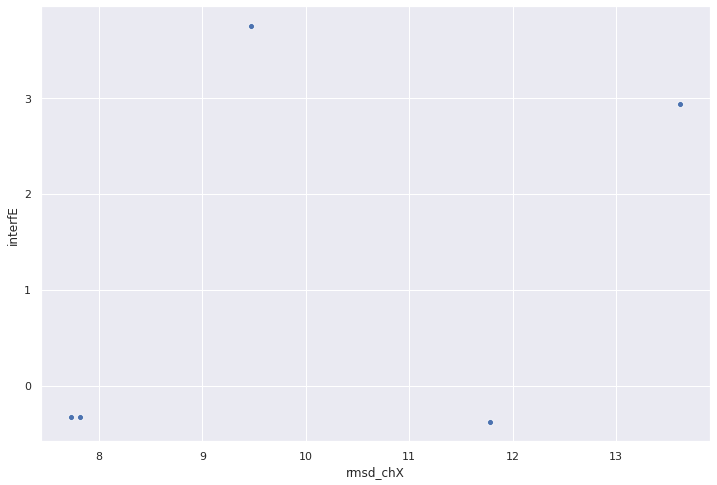

In [15]:
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
seaborn.scatterplot(x="rmsd_chX", y="interfE", data=df)

We can check which `.pdb` file has the lowest `interfE` score:

In [16]:
df.sort_values(by="interfE")

,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,interfE,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,rmsd_chX,total_score,yhh_planarity
4,0.0,-3246.610207,1585.290000,-727.945308,1301.132015,109.147282,933.234359,1872.078060,-69.590704,-100.963594,-58.705269,-196.408615,-0.375605,-74.487095,214.995496,-122.728950,50.796050,1.422722,213.48252,11.784042,-574.019256,0.000000
0,0.0,-3238.146212,1562.937506,-725.588698,1298.238454,109.250323,876.252579,1862.973628,-69.821278,-100.851318,-56.501676,-196.158306,-0.327919,-75.074810,207.696298,-123.495350,51.692238,2.898161,213.48252,7.812201,-619.048682,0.000000
1,0.0,-3234.387877,1566.747124,-724.172184,1303.256749,108.326948,871.750710,1862.691410,-70.723646,-101.288453,-57.018896,-196.009005,-0.323956,-73.762114,215.075495,-122.549088,51.692238,3.783256,213.48252,7.729473,-611.338370,0.003614
2,0.0,-3237.486734,1557.880337,-734.780767,1280.309328,106.937970,825.933446,1865.408021,-74.072568,-100.779933,-56.916882,-195.872898,2.938486,-76.826340,205.349359,-124.543942,50.834541,2.416340,213.48252,13.618117,-667.679505,0.004833
3,0.0,-3226.268422,1546.487115,-732.328791,1298.859229,105.382392,864.996516,1859.182650,-72.427579,-101.155931,-56.956479,-196.974655,3.746858,-75.433060,213.669606,-123.228240,51.714470,2.334085,213.48252,9.473510,-641.488806,0.001380


Let's take a look at the pose with the lowest `interfE` value that was generated:

In [17]:
#Skip for tests
lowest_energy_pdb_filename = './{}/{}_{}.pdb'.format(output_dir,target_protein, str(df.sort_values(by="interfE").head(1).index[0])) 
# os.path.join("output", str(df.sort_values(by="interfE").head(1).index[0]))
print(lowest_energy_pdb_filename)
test_pose = pyrosetta.io.pose_from_file(filename=lowest_energy_pdb_filename)

chE = pyrosetta.rosetta.core.select.residue_selector.ChainSelector("E")

view = viewer.init(test_pose)
view.add(viewer.setStyle())
view.add(viewer.setStyle(command=({"hetflag": True}, {"stick": {"colorscheme": "brownCarbon", "radius": 0.2}})))
view.add(viewer.setSurface(residue_selector=chE, opacity=0.7, color='white'))
view.add(viewer.setHydrogenBonds())
view()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
# file name with the lowest energy
print(lowest_energy_pdb_filename)

./output/A0A088RHB8.0.apo_4.pdb


If you think you achieved a good candidate, upload the pdb file to [Zindi](https://zindi.africa/competitions/indaba-grand-challenge-curing-leishmaniasis). you might be curing a Neglected Tropical Disease! To do this, click on the folder icon on the left of the colab notebook, under `output` directory download the above .pdb file and upload it to Zindi using the submit button on the competition page.

*Exercise:*

Re-run the above example with more sampling and with a different receptor protein and ligand (drug).

***
*Restart Jupyter Notebook kernel to properly re-initialize PyRosetta*
***